## Importing Dependencies

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report ,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.duplicated().sum()

1081

- Duplicates detected so removing the duplicates explicitly

In [10]:
df.drop_duplicates(df,inplace=True)

## Exploratory Data Analysis

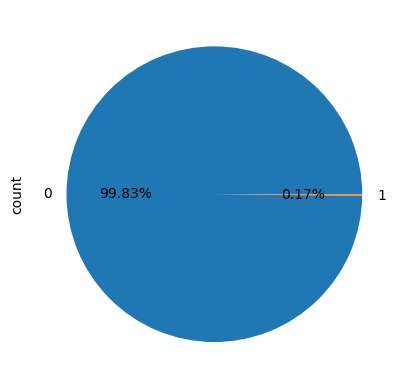

In [11]:
df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%',)
plt.show()

## Machine Learning

In [12]:
X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 30)
X Test  :  (70932, 30)
Y Train :  (212794,)
Y Test  :  (70932,)


In [13]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC=SVC()

In [15]:
li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,"\n",classification_report(y_test,ypred))
    print("--------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.68      0.64      0.66       112

    accuracy                           1.00     70932
   macro avg       0.84      0.82      0.83     70932
weighted avg       1.00      1.00      1.00     70932

--------------------------------------------
DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.70      0.75      0.72       112

    accuracy                           1.00     70932
   macro avg       0.85      0.87      0.86     70932
weighted avg       1.00      1.00      1.00     70932

--------------------------------------------
RandomForestClassifier() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.75      0.84       112

    accuracy   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932

--------------------------------------------
MLPClassifier() 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.48      0.77      0.59       112

    accuracy                           1.00     70932
   macro avg       0.74      0.88      0.80     70932
weighted avg       1.00      1.00      1.00     70932

--------------------------------------------


## Deep Neural Network

### 1. Model Architecture

In [17]:
model = tf.keras.models.Sequential([
    keras.layers.Input(shape=(30,)),
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation="sigmoid"),
    keras.layers.Dense(64,activation="tanh"),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(1,activation='sigmoid')
])

### 2. Model Compilation

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 3. Model Fit

In [20]:
es = tf.keras.callbacks.EarlyStopping(patience=10,
                                      monitor='val_loss',
                                      restore_best_weights=True)

history = model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=100,
                    batch_size=10000,
                    verbose=1,
                    callbacks=[es])

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8360 - loss: 0.3318 - val_accuracy: 0.9984 - val_loss: 0.0124
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9982 - loss: 0.0130 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0124 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0122 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0122 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9983 - loss: 0.0123 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0121 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0123 - val_accuracy: 0.9984 -

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,165 (113.93 KB)

 Trainable params: 9,721 (37.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,444 (75.96 KB)

In [22]:
loss, accuracy = model.evaluate(X_test,y_test)
print("Model Loss : " ,loss )
print("Model Accuracy : " ,accuracy)

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9984 - loss: 0.0119
Model Loss :  0.011761466972529888
Model Accuracy :  0.9984210133552551


## Predictions


2217/2217 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


<Axes: >

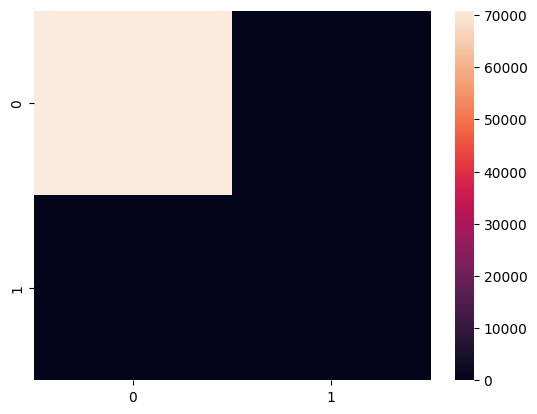

In [23]:
y_pred = model.predict(X_test)
y_pred= [np.round(i[0]) for i in y_pred]
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm)

In [27]:
cr = classification_report(y_test,y_pred)
print("The Classification Report : \n", cr)

The Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932



## Plot the accuracy and loss curves

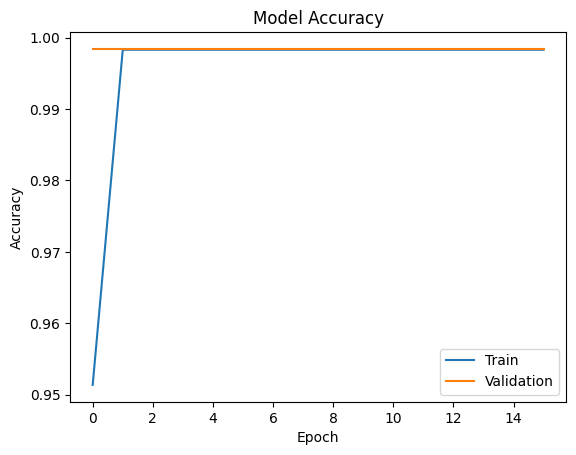

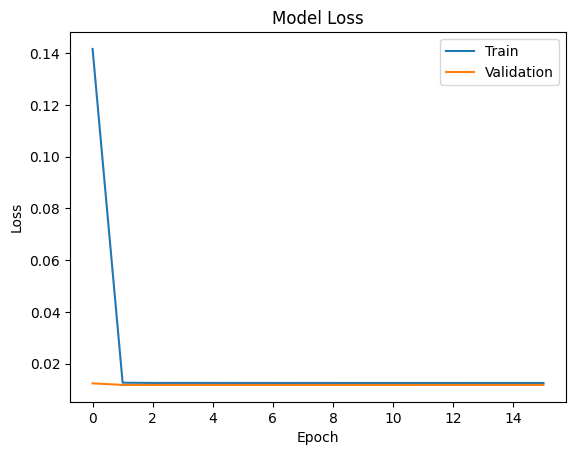

In [25]:
plt.plot(history.history["accuracy"])

plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()